# 2019-05-29 

## manipulating pandas objects

I am following [Jake VanderPlas](https://github.com/jakevdp/PythonDataScienceHandbook)' `03.01-Introducing-Pandas-Objects.ipynb`.

> ... three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

In [269]:
import numpy as np
import pandas as pd

In [270]:
%ls data/*

data/2018-05-16-wood-metadata-federal-archives.txt

data/2018-05-16-NARA-master-manifest:
CG.csv  Navy_A2.csv  Navy.csv  RAC.csv  sums.csv  USCS.csv


### `DataFrame`

In [356]:
table = pd.read_csv('data/2018-05-16-NARA-master-manifest/CG.csv')
table.rename(str.strip, axis='columns',inplace=True) #trim spaces
[table.loc[j] for j in range(0,1000, 333)] #preview

[Ship Name                                                    AIVIK
 Record Group                                                    26
 Entry Number                                                 159-E
 Box or Volume Number                                         Box 2
 Digital Directory                                    aivik-1943-01
 Start Date                                              01/01/1943
 End Date                                                01/31/1943
 Box or Volume Number.1                                       Box 2
 Assets                                                           1
 Number of Images                                                38
 Number of Pages                                                 73
 NARA URL                  https://catalog.archives.gov/id/23709293
 Geographic Focus                                            Arctic
 Name: 0, dtype: object,
 Ship Name                                                   CHELAN
 Record Group          

> Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [272]:
table.values

array([['AIVIK', 26.0, '159-E', ..., '73',
        'https://catalog.archives.gov/id/23709293', 'Arctic'],
       ['AIVIK', 26.0, '159-E', ..., '63',
        'https://catalog.archives.gov/id/23709331', 'Arctic'],
       ['AIVIK', 26.0, '159-E', ..., '71',
        'https://catalog.archives.gov/id/23709365', 'Arctic'],
       ...,
       ['WESTWIND (WAG-281)', 26.0, '330', ..., '384',
        'https://catalog.archives.gov/id/23657590', 'Arctic'],
       ['WESTWIND (WAG-281)', 26.0, '330', ..., '407',
        'https://catalog.archives.gov/id/23657786', 'Arctic'],
       ['TOTALS', nan, nan, ..., '446,700', nan, nan]], dtype=object)

In [293]:
table.values[0]

array(['AIVIK', 26.0, '159-E', 'Box 2', 'aivik-1943-01', '01/01/1943',
       '01/31/1943', 'Box 2', '1', '38', '73',
       'https://catalog.archives.gov/id/23709293', 'Arctic'], dtype=object)

In [294]:
table.values[:,-2]

array(['https://catalog.archives.gov/id/23709293',
       'https://catalog.archives.gov/id/23709331',
       'https://catalog.archives.gov/id/23709365', ...,
       'https://catalog.archives.gov/id/23657590',
       'https://catalog.archives.gov/id/23657786', nan], dtype=object)

In [295]:
table.index

RangeIndex(start=0, stop=1185, step=1)

### `Series`

Recall `np.linspace`. Recall accessing values in an array.

In [296]:
data = pd.Series(np.linspace(0,1,5)); data

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [297]:
data.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [298]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [299]:
data[:-1]

0    0.00
1    0.25
2    0.50
3    0.75
dtype: float64

In [300]:
data[2:-1]

2    0.50
3    0.75
dtype: float64

> From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

> This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.

To define a series with a rational number as an index.

In [301]:
ell = len(table.values)

In [302]:
urls = pd.Series(table.values[:,-2], index=np.linspace(0,1,ell))
urls.head()

0.000000    https://catalog.archives.gov/id/23709293
0.000845    https://catalog.archives.gov/id/23709331
0.001689    https://catalog.archives.gov/id/23709365
0.002534    https://catalog.archives.gov/id/23709403
0.003378    https://catalog.archives.gov/id/23709436
dtype: object

In [303]:
step = 1.0/(ell-1)
step

0.0008445945945945946

> And the item access works as expected:

In [304]:
#urls[0.000845] fails, KeyError: 0.000845
urls[step] #use the exact key

'https://catalog.archives.gov/id/23709331'

To define a series with a URL as an index.
> We can even use non-contiguous or non-sequential indices:

In [305]:
urls_again = pd.Series(np.linspace(0,1,len(table.values[:,-2])), index=table.values[:,-2])
urls_again.head()

https://catalog.archives.gov/id/23709293    0.000000
https://catalog.archives.gov/id/23709331    0.000845
https://catalog.archives.gov/id/23709365    0.001689
https://catalog.archives.gov/id/23709403    0.002534
https://catalog.archives.gov/id/23709436    0.003378
dtype: float64

In [306]:
urls_again.index

Index(['https://catalog.archives.gov/id/23709293',
       'https://catalog.archives.gov/id/23709331',
       'https://catalog.archives.gov/id/23709365',
       'https://catalog.archives.gov/id/23709403',
       'https://catalog.archives.gov/id/23709436',
       'https://catalog.archives.gov/id/23709473',
       'https://catalog.archives.gov/id/23709510',
       'https://catalog.archives.gov/id/23709548',
       'https://catalog.archives.gov/id/23709581',
       'https://catalog.archives.gov/id/23709618',
       ...
       'https://catalog.archives.gov/id/23656384',
       'https://catalog.archives.gov/id/23656558',
       'https://catalog.archives.gov/id/23656724',
       'https://catalog.archives.gov/id/23656854',
       'https://catalog.archives.gov/id/23656902',
       'https://catalog.archives.gov/id/23657110',
       'https://catalog.archives.gov/id/23657374',
       'https://catalog.archives.gov/id/23657590',
       'https://catalog.archives.gov/id/23657786',
                    

In [307]:
# For example, we access a url via the index's index, 
# then pass the url as a key for the Series `data`
# (This is excessive.)
np.array([urls_again[urls_again.index[i]] for i in range(10)])

array([0.        , 0.00084459, 0.00168919, 0.00253378, 0.00337838,
       0.00422297, 0.00506757, 0.00591216, 0.00675676, 0.00760135])

In [308]:
# equivalently ...
np.linspace(0,1,ell)[:10]

array([0.        , 0.00084459, 0.00168919, 0.00253378, 0.00337838,
       0.00422297, 0.00506757, 0.00591216, 0.00675676, 0.00760135])

### `Series` as specialized dictionary

> In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

> The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [326]:
ships = table['Ship Name'].unique()
ships

array(['AIVIK', 'AKLAK', 'ALATOK', 'ALERT', 'AMAROK', 'ARLUK', 'ATAK',
       'ATALANTA', 'BEAR', 'BONHAM', 'CHELAN', 'COMANCHE',
       'COMMODORE PERRY', 'CORWIN', 'CYANE', 'EASTWIND (WAG-279)',
       'EASTWIND (WAGB-279)', 'FREDERICK LEE', 'HAIDA', 'MANNING',
       'MCCULLOCH', 'McCULLOCH', 'MODOC', 'MOHAWK', 'MOJAVE', 'NANOK',
       'NOGAK', 'NORTHLAND', 'NORTH STAR', 'NORTHWIND (WAG-282)',
       'ONONDAGA (WPG-79)', 'RUSH', 'SHOSHONE', 'SNOHOMISH',
       'SOUTHWIND (WAG-280)', 'STORIS', 'TAHOMA', 'TALLAPOOSA', 'THETIS',
       'UNALGA', 'WESTWIND (WAG-281)', 'TOTALS'], dtype=object)

In [362]:
# explicit index
table['Ship Name'][25:35] # an arbitrary slice

25     AKLAK
26     AKLAK
27     AKLAK
28     AKLAK
29     AKLAK
30     AKLAK
31    ALATOK
32    ALATOK
33    ALATOK
34    ALATOK
Name: Ship Name, dtype: object

In [351]:
table.loc[1]

Ship Name                                                    AIVIK
Record Group                                                    26
Entry Number                                                 159-E
Box or Volume Number                                         Box 2
Digital Directory                                    aivik-1943-02
Start Date                                              02/01/1943
End Date                                                02/28/1943
Box or Volume Number.1                                       Box 2
Assets                                                           1
Number of Images                                                32
Number of Pages                                                 63
NARA URL                  https://catalog.archives.gov/id/23709331
Geographic Focus                                            Arctic
Name: 1, dtype: object

In [ ]:
dict([str(ships[i]), table.columns[0].value_counts()])

Clean this up a bit..

**rename columns**

In [29]:
df.rename(columns={'# timestamp': 'timestamp'}, inplace=True)
df.columns

Index(['Ship Name                                    ', 'Record Group',
       'Entry Number', 'Box or Volume Number', 'Digital Directory ',
       'Start Date', 'End Date', 'Box or Volume Number.1', 'Assets',
       'Number of Images', 'Number of Pages', 'NARA URL', 'Geographic Focus'],
      dtype='object')

In [32]:
df[1].str.strip()

KeyError: 1

Convert to `datetime`.

In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

KeyError: 'timestamp'

Set the index

In [39]:
df.set_index('timestamp', inplace=True)
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


Create a read function

In [40]:
%%writefile utils.py

import pandas as pd

def read_csv(filename):
    """ Simple read function for GridLABD files """
    df = pd.read_csv(filename, skiprows=8)
    df.rename(columns={'# timestamp': 'timestamp'}, inplace=True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    return df


Overwriting utils.py


In [41]:
import utils

df = utils.read_csv('data/measured_real_power.csv')
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


## Questions 

What does the raw data look like?

In [42]:
df.columns

Index(['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2',
       'triplex_meter_3', 'triplex_meter_4', 'triplex_meter_5',
       'triplex_meter_6', 'triplex_meter_7', 'triplex_meter_8',
       'triplex_meter_9', 'triplex_meter_10', 'triplex_meter_11',
       'triplex_meter_12', 'triplex_meter_13', 'triplex_meter_14',
       'triplex_meter_15', 'triplex_meter_16', 'triplex_meter_17',
       'triplex_meter_18', 'triplex_meter_19'],
      dtype='object')

Sometimes it's useful to look at a subset, like *triplex_meter_0* on *July 5th*.

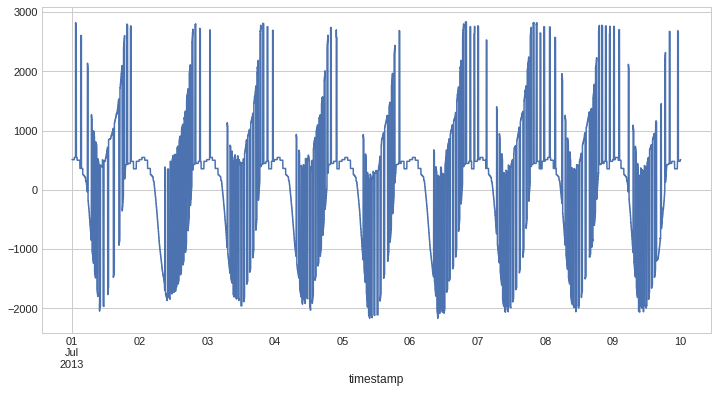

In [43]:
df['triplex_meter_0'].plot()

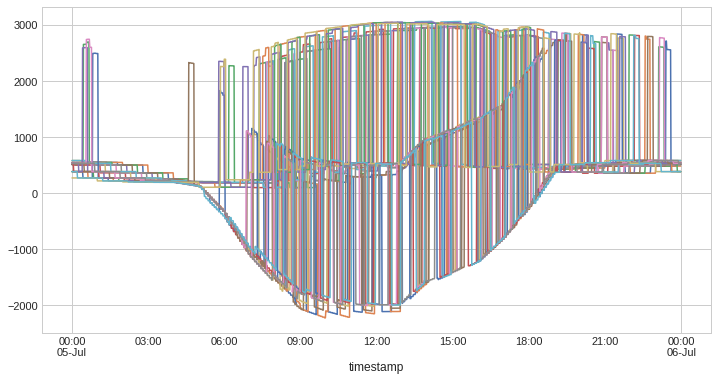

In [44]:
df.loc['2013-07-05'].plot(legend=False)

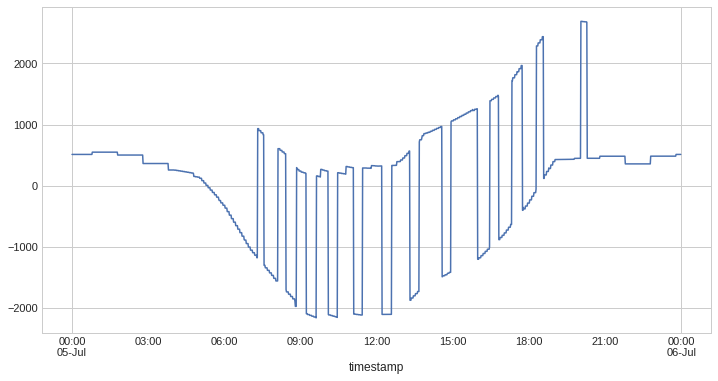

In [45]:
df.loc['2013-07-05', 'triplex_meter_0'].plot(legend=False)

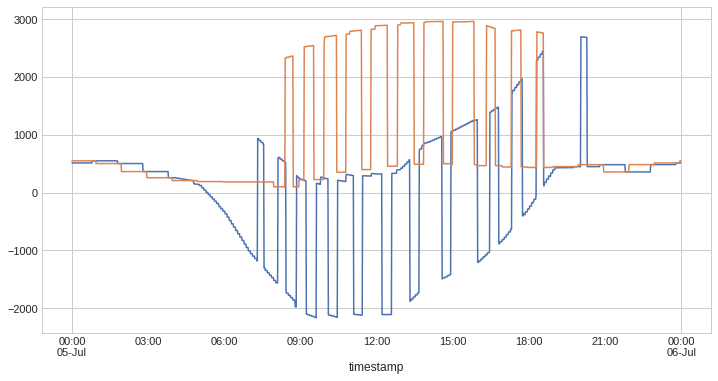

In [46]:
df.loc['2013-07-05', ['triplex_meter_0', 'triplex_meter_7']].plot(legend=False)

What's the average house power over time?

In [47]:
df.mean(axis=1).head()

timestamp
2013-07-01 00:00:00    491.2508
2013-07-01 00:01:00    491.2508
2013-07-01 00:02:00    491.2508
2013-07-01 00:03:00    491.2508
2013-07-01 00:04:00    483.8860
dtype: float64

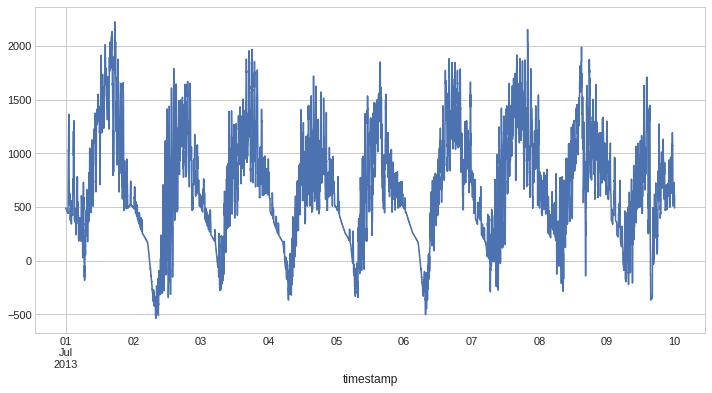

In [48]:
ax = df.mean(axis=1).plot()

Which house has the highest average value?

In [49]:
md = df.mean(axis=0).sort_values(ascending=True)  #axis=0!
md.tail()

triplex_meter_11    1150.707959
triplex_meter_4     1173.583409
triplex_meter_2     1225.211889
triplex_meter_18    1269.935302
triplex_meter_14    1302.686807
dtype: float64

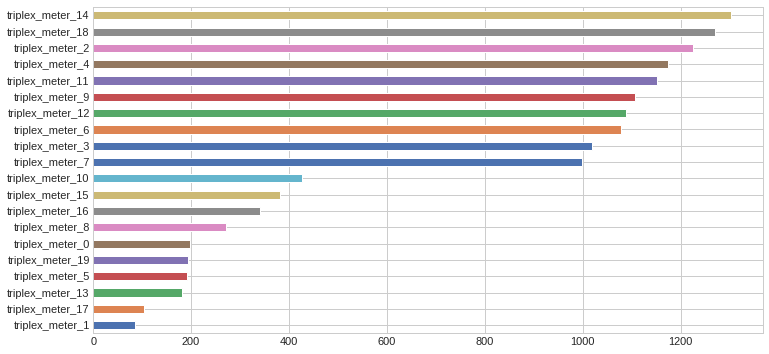

In [50]:
md.plot(kind='barh')

In [51]:
solar_houses = md[md<600].index
nonsolar_houses = md[md>=600].index

Box plot of `house_0`, `house_1`, `house_2`, and `house_3`.

In [52]:
tmp = df[['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2', 'triplex_meter_3']]
tmp.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3
timestamp,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924
2013-07-01 00:01:00,510.912,510.912,510.912,547.924
2013-07-01 00:02:00,510.912,510.912,510.912,547.924
2013-07-01 00:03:00,510.912,510.912,510.912,547.924
2013-07-01 00:04:00,510.911,510.911,510.911,547.922


**Boxplots**

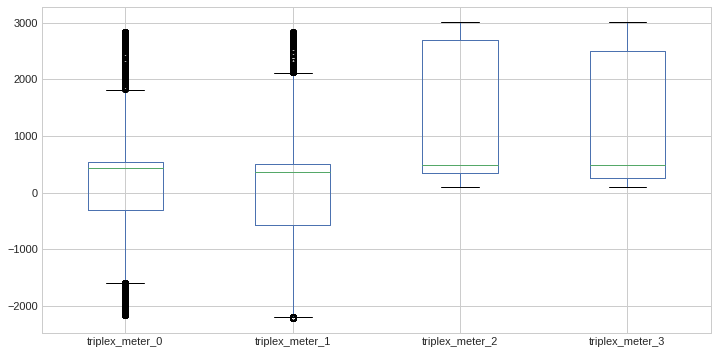

In [53]:
tmp.boxplot(return_type='axes')

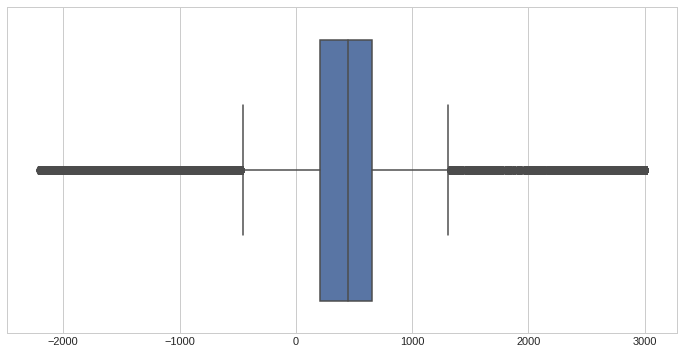

In [54]:
sns.boxplot(tmp)

We need to **melt**

In [55]:
tmp.melt().head()

,variable,value
0,triplex_meter_0,510.912
1,triplex_meter_0,510.912
2,triplex_meter_0,510.912
3,triplex_meter_0,510.912
4,triplex_meter_0,510.911


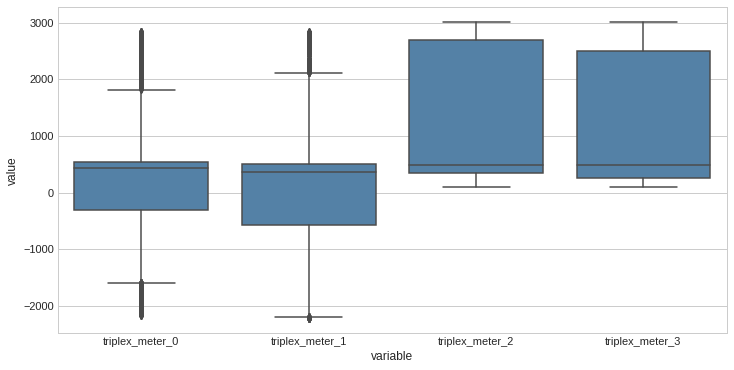

In [56]:
sns.boxplot(data=tmp.melt(), y='value', x='variable', color='steelblue')

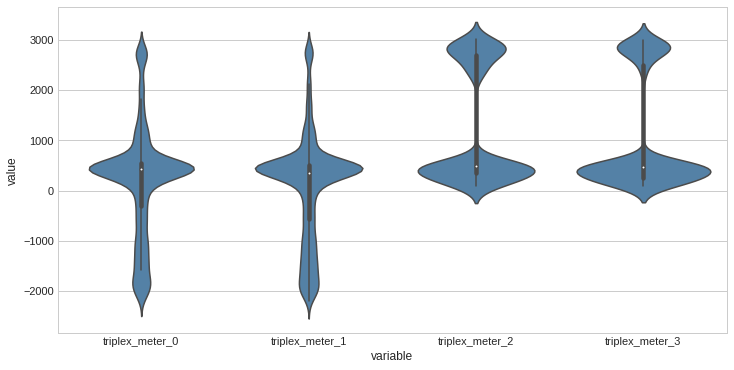

In [57]:
sns.violinplot(data=tmp.melt(), y='value', x='variable', color='steelblue')

Here's a little string formatting trick.

In [58]:
"word {}".format("hello")

'word hello'

In [59]:
[ "triplex_meter_{}".format(x) for x in range(5)]

['triplex_meter_0',
 'triplex_meter_1',
 'triplex_meter_2',
 'triplex_meter_3',
 'triplex_meter_4']

What is the average power of each house over time?

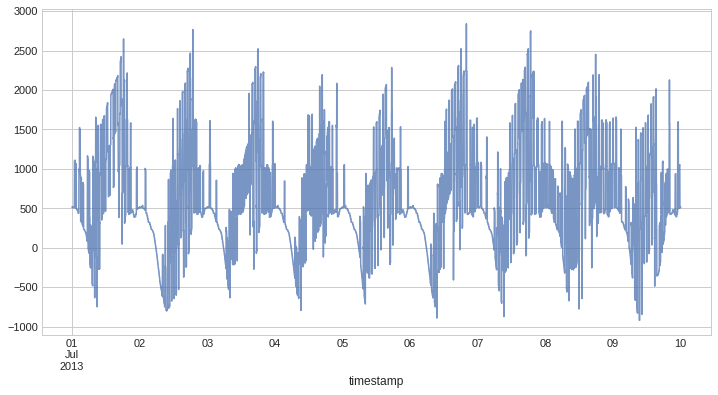

In [60]:
tmp = df[[ "triplex_meter_{}".format(x) for x in range(4)]]
_ = tmp.mean(axis=1).plot(legend=False, alpha=0.75)

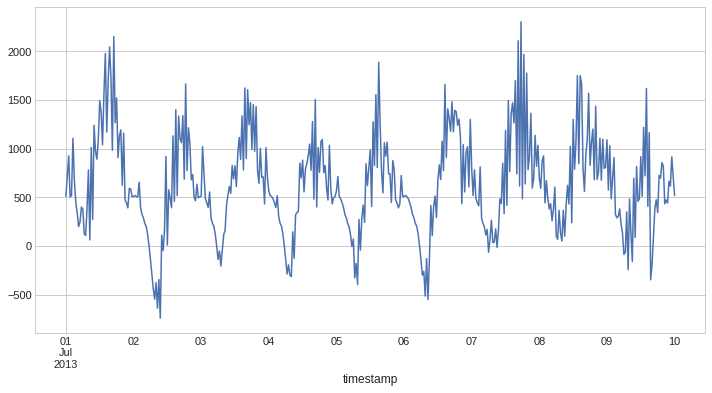

In [61]:
tmp.resample('30min').mean().mean(axis=1).plot(legend=False)

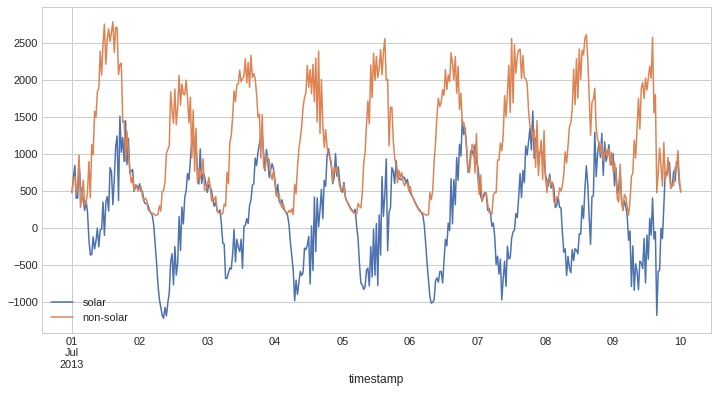

In [62]:
ax = df[solar_houses].resample('30min').mean().mean(axis=1).plot(label="solar", legend=True)
df[nonsolar_houses].resample('30min').mean().mean(axis=1).plot(label='non-solar', legend=True)